In [43]:
import pandas as pd

def eliminar_filas_mayores_a_100(df):
    """
    Elimina permanentemente las filas donde 'usdprice' sea mayor a 100.
    
    Parámetros:
        df (pd.DataFrame): El DataFrame original con los datos.
    
    Retorna:
        pd.DataFrame: El DataFrame modificado sin las filas que superan los 100 dólares.
    """
    # Convertir la columna 'usdprice' a valores numéricos, forzando errores a NaN
    df['usdprice'] = pd.to_numeric(df['usdprice'], errors='coerce')
    
    # Eliminar filas donde 'usdprice' sea mayor a 100
    df = df[df['usdprice'] <= 70]
    
    return df

# Cargar el archivo CSV
df = pd.read_csv('wfp_food_prices_col.csv')

# Eliminar filas con 'usdprice' mayor a 100
df = eliminar_filas_mayores_a_100(df)

# Guardar el DataFrame modificado en un nuevo archivo CSV (o sobrescribir el original)
df.to_csv('wfp_food_prices_col_limpio.csv', index=False)
print("Filas con 'usdprice' mayor a 100 eliminadas permanentemente. Datos guardados en 'wfp_food_prices_col_limpio.csv'.")

Filas con 'usdprice' mayor a 100 eliminadas permanentemente. Datos guardados en 'wfp_food_prices_col_limpio.csv'.


TypeError: agg function failed [how->mean,dtype->object]

Ingrediente más caro: Fish (dry) con un precio promedio de 8.97 COP


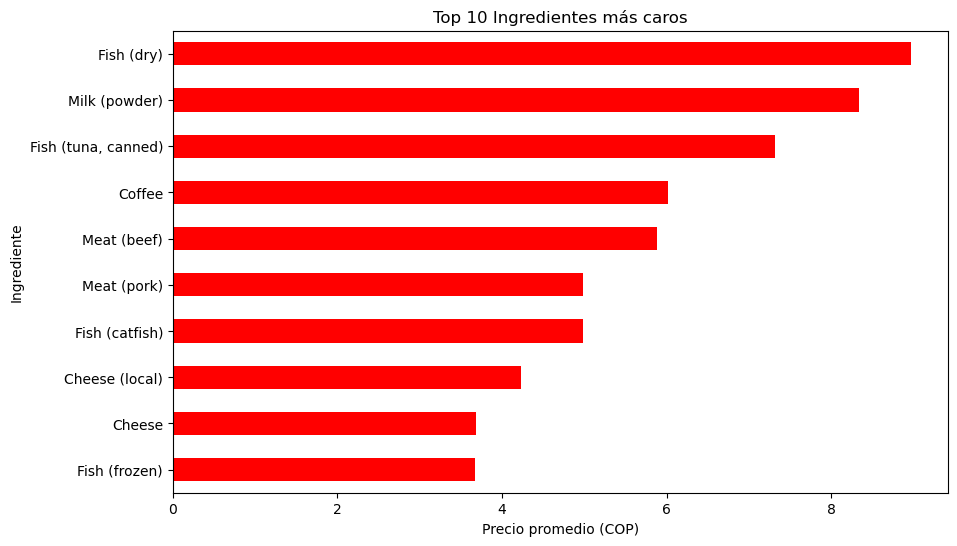

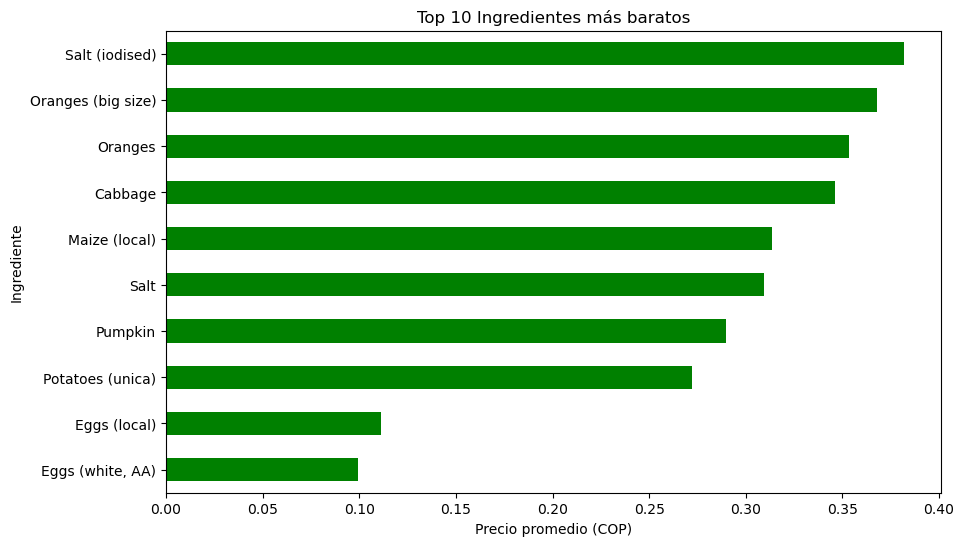

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('wfp_food_prices_col_limpio.csv')

# Convertir la columna 'price' a valores numéricos, forzando los errores a NaN
df['usdprice'] = pd.to_numeric(df['usdprice'], errors='coerce')

# Eliminar filas con valores faltantes en 'price'
df = df.dropna(subset=['usdprice'])

# Calcular el precio promedio por ingrediente
average_prices = df.groupby('commodity')['usdprice'].mean().sort_values()

# Seleccionar los 10 ingredientes con los precios más altos y más bajos
top_10_expensive = average_prices[-10:]
top_10_cheapest = average_prices[:10]

# Imprimir el ingrediente con el precio más alto
ingrediente_mas_caro = average_prices.idxmax()
precio_mas_caro = average_prices.max()
print(f"Ingrediente más caro: {ingrediente_mas_caro} con un precio promedio de {precio_mas_caro:.2f} COP")

# Crear la gráfica de los ingredientes más caros
plt.figure(figsize=(10, 6))
top_10_expensive.plot(kind='barh', color='red')
plt.title('Top 10 Ingredientes más caros')
plt.xlabel('Precio promedio (COP)')
plt.ylabel('Ingrediente')

# Formatear el eje x para mostrar el precio completo (sin notación científica)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

# Crear la gráfica de los ingredientes más baratos
plt.figure(figsize=(10, 6))
top_10_cheapest.plot(kind='barh', color='green')
plt.title('Top 10 Ingredientes más baratos')
plt.xlabel('Precio promedio (COP)')
plt.ylabel('Ingrediente')

# Formatear el eje x para mostrar el precio completo (sin notación científica)
plt.ticklabel_format(style='plain', axis='x')
plt.show()